# Week 19: In class exercise
## Unsupervised Learning
### 02/02/2022

**1. Take one of the supervised learning models you have built recently and apply at least three dimensionality reduction techniques to it (separately). Be sure to create a short summary of each technique you use. Indicate how each changed the model performance. Reference:** https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/

First, load in the necessary libraries and read in the file.

In [5]:
# Load in libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

# Load in file
diabetes_df = pd.read_csv("diabetes.csv")
# View sample
diabetes_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
700,2,122,76,27,200,35.9,0.483,26,0
62,5,44,62,0,0,25.0,0.587,36,0
583,8,100,76,0,0,38.7,0.190,42,0
685,2,129,74,26,205,33.2,0.591,25,0
735,4,95,60,32,0,35.4,0.284,28,0


**Original Logistic Regression without any tuning or dimensionality reduction**

Without applying any additional techniques, the logistic regression model produces a recall score of 52% and an accuracy of 75%. Our overall accuracy is okay, but the recall is definitely suffering. 

In [6]:
# Separate data into outcome vs predictors
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training vs. testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33, stratify=y)

# Standardize data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [7]:
# Set up classifier
log = LogisticRegression(random_state=33)

# Train our logistic regression model
log_model = log.fit(X_train, y_train)

# Get predicted values
y_pred = log_model.predict(X_test)

# View model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       150
           1       0.70      0.52      0.60        81

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



**First technique: Principal Component Analysis (PCA)**

PCA is a dimensionality reduction technique that plots data from higher dimensions onto lower dimensions. In the process of doing a PCA, we are finding dimensions that are possibly correlated with one another. We then group those into sets of data points that are linearly *uncorrelated* in order to maximize the amount of variance/information for our analysis. Those values are the 'principal components (PCs).' We can then learn the total amount of variance (or information) that our principal components are holding. We can narrow our components to only those that hold a substantial amount of variance. 

First, we have to select our number of principal components

<BarContainer object of 8 artists>

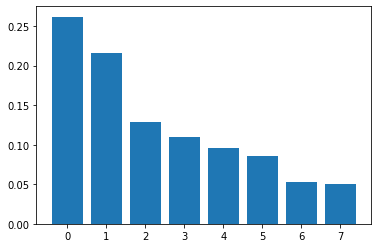

In [11]:
from sklearn.decomposition import PCA

# Create scaler instance
scaler = StandardScaler()
# Create PCA instance
pca = PCA()

# Make pipeline to apply scaler and pca
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to our original predictor values
pipeline.fit(X.values)

# View the full range of possible components
features = range(pca.n_components_)
# Plot the features against their explained variance
plt.bar(features, pca.explained_variance_ratio_)

By looking at this, it appears there are two features that hold the most variance collectively. However, if we only had those two features, a lot of information would be lost in our model. We can see that the explained variance is distributed rather evenly once we get to the 3rd component. There is a bit of a drop off after the 6th, so I will make the number of components 6 in the below code.

In [12]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=33, stratify=y)

# Standardize data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

# Create the PCA instance
pca = PCA(n_components=6)

# Fit the PCA instance to our model
X_train_pca=pca.fit_transform(X_train_sc)
X_test_pca=pca.fit_transform(X_test_sc)

# Run logistic regression model with our transformed data
pca_lr = LogisticRegression(random_state=33).fit(X_train_pca, y_train)

# Accuracy appears to be the same
pca_lr.score(X_test_pca, y_test)

# Get my predicted values
y_pred_pca = pca_lr.predict(X_test_pca)

# View model performance
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       150
           1       0.61      0.41      0.49        81

    accuracy                           0.70       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.69      0.70      0.68       231



The classification report above displays that the PCA technique actually made our model worse. By removing the two features, our recall reduced to 41% and the overall accuracy reduced to 70%.

**Second technique: Linear Discriminant Analysis (LDA)**

LDA is similar to PCA in that it is another linear dimension reduction technique. They also both aim to find the features that best explain the data. PCA focuses on finding maximum variation and is unsupervised. Constrastingly, LDA is a supervised technique that focuses more on finding maximum separation between groupings. It is especially useful for classification problems with a multitude of possible outputs (as opposed to binary).

For this technique, we want to set the number of components to classes-1. Our data are binary with two output classes, so we set our number of components to 1. Code is below

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=33, stratify=y)

# Standardize data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

# Create the LDA instance
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit the LDA instance to our model
X_train_lda=lda.fit_transform(X_train_sc, y_train)
X_test_lda=lda.fit_transform(X_test_sc, y_test)

# Run logistic regression model with our transformed data
lda_lr = LogisticRegression(random_state=33).fit(X_train_lda, y_train)

# Get accuracy score
lda_lr.score(X_test_lda, y_test)

# Get my predicted values
y_pred_lda = lda_lr.predict(X_test_lda)

# View model performance
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       150
           1       0.75      0.59      0.66        81

    accuracy                           0.79       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.79      0.78       231



This model has done the best so far. Out recall increased to 59% and overall accuracy increased to 79%.

**Third technique: Isomap Embedding**

Isomap embedding is a non-linear approach to dimensionality reduction. It first calculates the K-nearest neighbors for each data point. Data points that are "neighbors" with each other get connected. Next, the shortest path (using geodisic distance) between different nodes are calculated. Finally, the top n vectors represent the final coordinates of the newly constructed n-dimenionsal space.

In [18]:
from sklearn.manifold import Isomap

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=33, stratify=y)

# Standardize data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

# Create the Isomap instance
iso = Isomap(n_neighbors=3, n_components=5)

# Fit the LDA instance to our model
X_train_iso=iso.fit_transform(X_train_sc, y_train)
X_test_iso=iso.fit_transform(X_test_sc, y_test)

# Run logistic regression model with our transformed data
iso_lr = LogisticRegression(random_state=33).fit(X_train_iso, y_train)

# Get accuracy score
iso_lr.score(X_test_iso, y_test)

# Get my predicted values
y_pred_iso = iso_lr.predict(X_test_iso)

# View model performance
print(classification_report(y_test, y_pred_iso))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81       150
           1       0.73      0.23      0.36        81

    accuracy                           0.70       231
   macro avg       0.71      0.59      0.58       231
weighted avg       0.71      0.70      0.65       231



This model performed significantly worse than the other models, with a recall of 23% and an accuracy score of 70%.

**Summary**

Of all the techniques above, the LDA worked best - even better than the logistic regression model on its own. This is unsurprising to me, because this technique seems to be best suited for the diabetes data set. The LDA is better, in general, for classification problems. The make the model even better, we could conduct some resampling to boost our numbers from the minority class. The imbalanced data is likely hurting the performance more than anything else.

**2. Write a function that will indicate if an inputted IPv4 address is accurate or not. IP addresses are valid if they have 4 values between 0 and 255 (inclusive), punctuated by periods.**

**Input 1:**

2.33.245.5

**Output 1:**

True

**Input 2:**

12.345.67.89

**Output 2:**

False

In [19]:
# Define the function that takes in an IPv4 address as an argument
def IPv4(IP):
    try:
        # Store results
        result = []
        # Ensure the IPv4 address is a string
        if isinstance(IP, str):
            # Separate the string by the delimiter ('.')
            split_IP = IP.split('.')
            # Iterate through split_IP
            for i in split_IP:
                # Convert i to integer
                i = int(i)
                # Check to see if individual numbers are between 0 and 256
                if i in range(0,256):
                    result.append(True)
                else:
                    result.append(False)
        # Check to ensure there are only 4 values in the result list
        if len(result) == 4:
            # Print a boolean expression to check whether ALL items in result are 'true'
            # If there are any false, it will return false
            print(all(r == True for r in result))
        else:
            print('False')
        
    except ValueError:
        print('Please enter valid IP address')

In [20]:
# Input 1
IPv4('2.33.245.5')

True


In [21]:
# Input 2
IPv4('12.345.67.89')

False


In [22]:
# Input 3 (5 values instead of 4, but all within range)
IPv4('2.33.245.5.3.3')

False


In [23]:
IPv4(2) # random numer, invalid

False


In [24]:
IPv4('banana')

Please enter valid IP address
